In [161]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [162]:
df = pd.read_csv(".\\nba_logreg.csv") #loading the dataset

In [163]:
df.drop("Name", axis=1, inplace=True, errors='ignore') # Deleting the name since is not important for our predction
df

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [164]:
df.describe() # to get an overview of the data we are dealing with

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


### Looking for duplicated values

In [165]:
df[df.duplicated(df.columns[1:-1], keep=False)]

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
18,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,4.1,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,0.0
19,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,4.1,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,1.0
71,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,1.7,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,0.0
72,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,1.7,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,1.0
73,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,0.5,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,0.0
74,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,0.5,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,1.0
120,79,33.7,14.7,5.9,12.5,47.1,0.3,1.1,27.4,2.7,3.5,76.4,0.7,3.2,3.9,8.7,2.1,0.1,3.3,0.0
121,79,33.7,14.7,5.9,12.5,47.1,0.3,1.1,27.4,2.7,3.5,76.4,0.7,3.2,3.9,8.7,2.1,0.1,3.3,1.0
126,77,30.0,13.6,6.1,13.9,43.9,0.2,0.9,24.6,1.2,1.6,73.4,1.3,3.3,4.6,1.8,0.9,0.3,1.5,1.0
127,77,30.0,13.6,6.1,13.9,43.9,0.2,0.9,24.6,1.2,1.6,73.4,1.3,3.3,4.6,1.8,0.9,0.3,1.5,0.0


We can see that we have some ducplicated values and also some inconsistency in the data for exemple we have for the same values and player different outcome for the carreer span.
So for duplicated lines with the same value of TARGET_5Yrs we're keeping only one value.
We will delete all the inconsistent lines

In [166]:
reworked_df = pd.DataFrame(df.drop_duplicates()) # kepping only one line 
#when we have duplicates with the same feartures and the same target_5Yrs value

In [167]:
reworked_df.drop_duplicates(reworked_df.columns[1:-1],inplace=True) # deleting incoherent data (same features different outcome)

In [168]:
reworked_df[reworked_df.duplicated(reworked_df.columns[1:-1], keep=False)].shape # checking if all ducplicates are deleted

(0, 20)

### Looking for nan values

In [169]:
reworked_df.isna().any().sum() # checking nan values

1

In [170]:
reworked_df[reworked_df.isnull().any(axis=1)] #getting nan values

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0
559,56,18.9,4.7,2.1,4.6,45.0,0.0,0.0,NaN,0.5,0.7,67.5,1.1,3.8,4.9,0.7,0.6,0.8,1.1,1.0


I think that these nan values are the result of a 0 divided 0. So it's safe to replace them by 0.

In [171]:
reworked_df.fillna(0, inplace=True) # replacing nan with 0

### Classification algorithms

First we are starting with a simple classification algorithm: Decision tree

In [172]:
def score_classifier(dataset,classifier,labels):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """

    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    recall = 0
    f1_s = 0
    preci = 0 
    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        classifier.fit(training_set,training_labels)
        predicted_labels = classifier.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
        f1_s = f1_score(test_labels, predicted_labels)
        preci = precision_score(test_labels, predicted_labels)
    recall/=3
    f1_s/=3
    preci/=3
    print(f1_s)
    print(preci)
    print(confusion_mat)
    print(recall)

In [173]:
X = reworked_df.drop(["TARGET_5Yrs",'GP'], axis=1).values
y = reworked_df["TARGET_5Yrs"].values

In [174]:
score_classifier(X, DecisionTreeClassifier(), y) # trying decision tree using the provided method score_classifier

0.22958870472682627
0.2343358395989975
[[259. 233.]
 [259. 557.]]
0.6827529673966154


67% for the recall is a good start, we can improve this score using a grid search to get the best params but using a more complicated algorithm is better suited 

In [175]:
score_classifier(X, RandomForestClassifier(), y) # trying randomforest classifier using the provided method score_classifier

0.24970963995354242
0.24130190796857465
[[242. 250.]
 [170. 646.]]
0.7918906911593041


80% is better now we can use a grid search to get the best params to use with our classifier

### Grid search

In [176]:
grid = { 
    'n_estimators': [i for i in range(50, 200, 10)],
    'max_depth' : [i for i in range(5,30,5)],
    'criterion' :['gini', 'entropy'],
    'random_state' : [42]
} # setting params for the grid search

In [177]:
grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, scoring='recall', verbose=2) 

In [227]:
scaler = StandardScaler()

X = scaler.fit_transform(reworked_df.drop(["TARGET_5Yrs"], axis=1)) # standardizing the data to get 
#more stable model and accelerate computations

grid_rf.fit(X, reworked_df["TARGET_5Yrs"]) # trying the different params to get the best estimator

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] criterion=gini, max_depth=5, n_estimators=50, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=50, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=50, random_state=42 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, n_estimators=50, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=50, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=50, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=50, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=50, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=50, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=50, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=60, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=60, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=60, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=60, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=60, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=60, random_state=42, total= 

[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  4.4min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140, 150, 160, 170, 180, 190],
                         'random_state': [42]},
             scoring='recall', verbose=2)

In [228]:
best_random_forest_classifier = grid_s.best_estimator_
best_random_forest_classifier

RandomForestClassifier(max_depth=5, n_estimators=150, random_state=42)

In [229]:
score_classifier(X, best_random_forest_classifier, y) # trying the best estimator found

0.2530755711775044
0.2465753424657534
[[260. 232.]
 [158. 658.]]
0.8066662497690161


#### Trying SVM classifier

In [181]:
param_grid = {'C':[1,5], 'kernel':['poly', 'rbf', 'sigmoid', 'linear']} # params to be tested from the SVM algorithm

In [182]:
grid_svc = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='recall', verbose=2)

In [183]:
grid_svc.fit(X,y) # fitting the grid search

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, kernel=poly ................................................
[CV] ................................. C=1, kernel=poly, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ................................. C=1, kernel=poly, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ................................. C=1, kernel=poly, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ................................. C=1, kernel=poly, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ................................. C=1, kernel=poly, total=   0.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.1s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=   0.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=   0.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.9s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5],
                         'kernel': ['poly', 'rbf', 'sigmoid', 'linear']},
             scoring='recall', verbose=2)

In [184]:
grid_svc.best_estimator_

SVC(C=1, kernel='poly')

In [185]:
score_classifier(X,grid_svc.best_estimator_, y)

0.2539200809307031
0.21902268760907506
[[ 80. 412.]
 [ 53. 763.]]
0.9353946668649747


#### trying knn classifier

In [186]:
grid_nn_param = {'n_neighbors':[i for i in range(2,10)]}
grid_nn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid_nn_param, scoring='recall', verbose=2)
grid_nn.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='recall', verbose=2)

In [187]:
score_classifier(X, grid_nn.best_estimator_, y)

0.24231678486997632
0.2380952380952381
[[223. 269.]
 [188. 628.]]
0.7700760245011212


In [188]:
grid_nn.best_estimator_

KNeighborsClassifier(n_neighbors=7)

### Down sampling

In [189]:
reworked_df["TARGET_5Yrs"].value_counts()

1.0    816
0.0    492
Name: TARGET_5Yrs, dtype: int64

In [190]:
reworked_df = reworked_df.reset_index().drop("index", axis=1)
true_indexes = reworked_df[reworked_df["TARGET_5Yrs"] == 1].index # get the index of true values

In [191]:
down_sampling_indexes = np.random.randint(0,high=len(true_indexes), size=492) # sample from these 492 index 
#to get a perfectly balanced dataset

true_indexes[down_sampling_indexes]

Int64Index([ 374,  282,  359,   45, 1169, 1304, 1198, 1161, 1287,  299,
            ...
             303, 1282,   80,  910,  827,  913, 1031,  168, 1270,   21],
           dtype='int64', length=492)

In [192]:
df_sampled = pd.concat([reworked_df.iloc[true_indexes[down_sampling_indexes]], reworked_df[reworked_df["TARGET_5Yrs"] == 0]]) # create 
#the new dataframe 

In [193]:
df_sampled.columns


Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'TARGET_5Yrs'],
      dtype='object')

In [194]:
X_sampled = df_sampled.drop(["TARGET_5Yrs"], axis=1).values
y_sampled = df_sampled["TARGET_5Yrs"].values

In [195]:
scaler_1 = StandardScaler()
X_sampled = scaler_1.fit_transform(df_sampled.drop(["TARGET_5Yrs"], axis=1))

In [230]:
score_classifier(X_sampled, best_random_forest_classifier, y_sampled)

0.22580645161290325
0.2536231884057971
[[364. 128.]
 [165. 327.]]
0.6653834598671546


In [199]:
grid_rf_2 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, scoring='recall', verbose=2)

In [200]:
grid_rf_2.fit(X_sampled, df_sampled["TARGET_5Yrs"])

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] criterion=gini, max_depth=5, n_estimators=50, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=50, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=50, random_state=42 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, n_estimators=50, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=50, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=50, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=50, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=50, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=50, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=50, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=60, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=60, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=60, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=60, random_state=42, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=60, random_state=42 ...
[CV]  criterion=gini, max_depth=5, n_estimators=60, random_state=42, total= 

[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  3.5min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140, 150, 160, 170, 180, 190],
                         'random_state': [42]},
             scoring='recall', verbose=2)

In [201]:
grid_rf_2.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=180, random_state=42)

In [202]:
score_classifier(X, grid_rf_2.best_estimator_, y)

0.2481159420289855
0.23937360178970915
[[252. 240.]
 [162. 654.]]
0.8019462260356759


DownSampling didn't improve the recall (80%) maybe because of the data, we don't have too many lines to train our model when downsampling

### Stacking model

In [203]:
from collections import Counter

In [148]:
class stacking_model:
    """
    This class is used to stack different models, train them and also get their predictions
    ...

    Attributes
    ----------
    models : a list of skleran models
        

    Methods
    -------
    fit(X,y)
        Train the different models separatly
    predict(X,y)
        get prediction of the final model
    """
   
    def __init__(self, *models):
        """
        Parameters
        ----------
        name : list of sklearn models
        """
        self.__models__ = models
    
    def fit(self,X,y):
        """ trains the different models separatly
        
        Parameters
        ----------
        X : np.array
            values of the features used for training
        y : np.array
            The labels
        """
        for model in self.__models__:
            model.fit(X,y)
    
    def predict(self,X):
        """ Get the prediction of the final model
        
        this prediction is calculated using vote from the classifiers, the label
        with most occurences among the predicted values is chosen to be the final prediction
        
        Parameters
        ----------
        X : np.array
            values of the features used for predcition
        """
        predictions = []
        for line in X:
            sub_prediction = [] #to stock all prediction 
            for model in self.__models__ :
                sub_prediction.append(model.predict(line.reshape(1,-1))[0])
            predictions.append(Counter(np.array(sub_prediction)).most_common(1)[0][0]) # calculate the most common label
        return np.array(predictions)

In [149]:
b = stacking_model(RandomForestClassifier(), SVC())

In [150]:
model = stacking_model(grid_s.best_estimator_, grid_svc.best_estimator_, grid_nn.best_estimator_)

In [151]:
score_classifier(X, model, y)

0.2478777589134126
0.23397435897435895
[[190. 302.]
 [129. 687.]]
0.8425062912440359


### feature selection

In [231]:
grid_rf.best_estimator_.feature_importances_ # get the most important features 
#this is not done with the SVM because we are using a non linear kernel

array([0.11961192, 0.0613319 , 0.06726254, 0.05356501, 0.05177177,
       0.07555149, 0.02045145, 0.03627714, 0.04453014, 0.0582418 ,
       0.04608986, 0.06591772, 0.0468988 , 0.04756017, 0.05618729,
       0.04401437, 0.03529255, 0.03123526, 0.0382088 ])

In [232]:
reworked_df.columns[0:-1]

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

Text(0.5, 1.0, 'Feature importance')

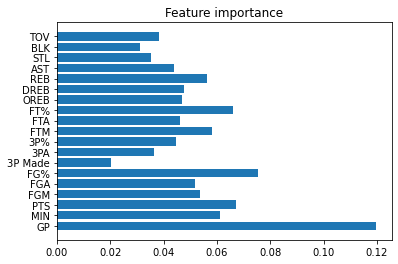

In [233]:
plt.barh(reworked_df.columns[0:-1], grid_rf.best_estimator_.feature_importances_)
plt.title("Feature importance")

In [248]:
features = reworked_df.columns[0:-1]
selected_features = features[best_random_forest_classifier.feature_importances_ > 0.05] # getting the most significant features
reworked_df[selected_features]

,GP,PTS,FGM,FG%,FTM,FT%,REB
0,36,7.4,2.6,34.7,1.6,69.9,4.1
1,35,7.2,2.0,29.6,2.6,76.5,2.4
2,74,5.2,2.0,42.2,0.9,67.0,2.2
3,58,5.7,2.3,42.6,0.9,68.9,1.9
4,48,4.5,1.6,52.4,1.3,67.4,2.5
...,...,...,...,...,...,...,...
1303,80,4.3,1.6,43.3,1.2,79.2,1.2
1304,68,3.9,1.5,35.8,0.8,79.4,1.5
1305,43,5.4,2.2,55.0,1.0,64.3,3.8
1306,52,4.5,1.7,43.9,1.2,62.5,0.7


In [249]:
scal = StandardScaler()
X_samp = scaler.fit_transform(reworked_df[selected_features])

In [250]:
score_classifier(X_samp, grid_rf.best_estimator_, reworked_df["TARGET_5Yrs"].values)

0.25641025641025644
0.24858757062146894
[[257. 235.]
 [154. 662.]]
0.8115944737797226


### Saving the model for the API

In [251]:
import joblib # for saving the model and scaler

In [252]:
grid_svc = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='recall', verbose=2)

In [253]:
scal = StandardScaler()
X_samp = scal.fit_transform(reworked_df[selected_features])

In [254]:
grid_svc.fit(X_samp, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, kernel=poly ................................................
[CV] ................................. C=1, kernel=poly, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ................................. C=1, kernel=poly, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ................................. C=1, kernel=poly, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ................................. C=1, kernel=poly, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ................................. C=1, kernel=poly, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=   0.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=   0.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=   0.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.5s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5],
                         'kernel': ['poly', 'rbf', 'sigmoid', 'linear']},
             scoring='recall', verbose=2)

In [255]:
score_classifier(X_samp, grid_svc.best_estimator_, y)

0.2644206227667177
0.22960992907801417
[[117. 375.]
 [ 44. 772.]]
0.9462241632817759


In [258]:
joblib.dump(grid_svc.best_estimator_, "NBA_prediction_model") # Storing the model for the API to use it

['NBA_prediction_model']

In [259]:
joblib.dump(scal,"Stand_scaler") # Storing the scaler for the API to scale the provided data

['Stand_scaler']

In [270]:
t = scal.transform(reworked_df.loc[reworked_df["TARGET_5Yrs"] == 1][selected_features].iloc[0].values.reshape(1,-1))

In [264]:
model = joblib.load("NBA_prediction_model")

In [272]:
reworked_df.loc[reworked_df["TARGET_5Yrs"] == 1][selected_features].iloc[0].values

array([58. ,  5.7,  2.3, 42.6,  0.9, 68.9,  1.9])